<a href="https://colab.research.google.com/github/nnilayy/LLMs-And-Transformers/blob/main/Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

# Basics


## Sentiment Analysis

In [ ]:
# Sentiment Analsysis
from transformers import pipeline

classifier = pipeline("sentiment-analysis",model="distilbert-base-uncased-finetuned-sst-2-english")
classifier("horrible piece of nice trash.")

[{'label': 'POSITIVE', 'score': 0.984700083732605}]

## Zero Shot Classification

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
classifier(
    "This is a shit movie about Goverment the Transformers library",
    candidate_labels=["movies", "politics", "business"],
)

## Text Generation

In [ ]:
# Text Generation
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "Model distilgpt2 repeats the words after some times, this is because",
    max_length=100,
    num_return_sequences=2,
)
# A perfect example of model Hallucinatuion

## Mask Filling

In [ ]:
# Mask Filling Model
from transformers import pipeline

unmasker = pipeline("fill-mask", model="distilroberta-base")
unmasker("This course will teach you all about <mask> models.", top_k=2)

## Named Entity Recognition

In [ ]:
# Named Entity Recognition
from transformers import pipeline

ner = pipeline("ner",model='dbmdz/bert-large-cased-finetuned-conll03-english', grouped_entities=True)
ner("hey there, I am Nilay and the Text Generation model above was hallucinating.")

[{'entity_group': 'PER',
  'score': 0.9974254,
  'word': 'Nilay',
  'start': 16,
  'end': 21},
 {'entity_group': 'MISC',
  'score': 0.56624573,
  'word': 'Text',
  'start': 30,
  'end': 34},
 {'entity_group': 'ORG',
  'score': 0.7065201,
  'word': 'Generation',
  'start': 35,
  'end': 45}]

## QnA

In [ ]:
# Question and Answering
from transformers import pipeline

question_answerer = pipeline("question-answering",  model="distilbert-base-cased-distilled-squad")
question_answerer(
    question="Where do I sleep?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

{'score': 0.48142537474632263,
 'start': 33,
 'end': 45,
 'answer': 'Hugging Face'}

## Summarization

In [ ]:
# Summarization
from transformers import pipeline

summarizer = pipeline("summarization",model="sshleifer/distilbart-cnn-12-6")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

## Translation

In [ ]:
!pip install sentencepiece

In [ ]:
# French to English Translation
from transformers import pipeline
import sentencepiece
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

# Inside the Pipeline Function

In [ ]:
# raw text --> tokens --> special tokens at starting and end --> numbers[vector]
from transformers import AutoTokenizer
checkpoint="distilbert-base-uncased-finetuned-sst-2-english"
tokenizer=AutoTokenizer.from_pretrained(checkpoint)
raw_inputs=["I've been waiting for a hugging face course my whole life",
            "I hate this so badly right now"]
inputs=tokenizer(raw_inputs,padding=True,truncation=True,return_tensors="pt")
inputs

In [ ]:
# AutoModel: Thats Model Doesnt have a Head
from transformers import AutoModel
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

In [ ]:
outputs=model(**inputs)
outputs.last_hidden_state.shape

In [32]:
from transformers import AutoModelForSequenceClassification
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

In [ ]:
outputs=model(**inputs)
outputs.logits.shape

In [ ]:
# The Model Output doesnt make sense
outputs.logits

In [37]:
# the Outputs are logits and not probabilities
import torch
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[1.7912e-03, 9.9821e-01],
        [9.9951e-01, 4.8962e-04]], grad_fn=<SoftmaxBackward0>)


In [38]:
# To get the labels of the model we can use the following
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [ ]:
# The output of a teansformers is a vector with three dimensions:
# ()Batch Size: Number of sentences/sequences processed at one time
# ()Sequence Length: Length of each sequence.
# ()Hidden State: Number of features model was trained on

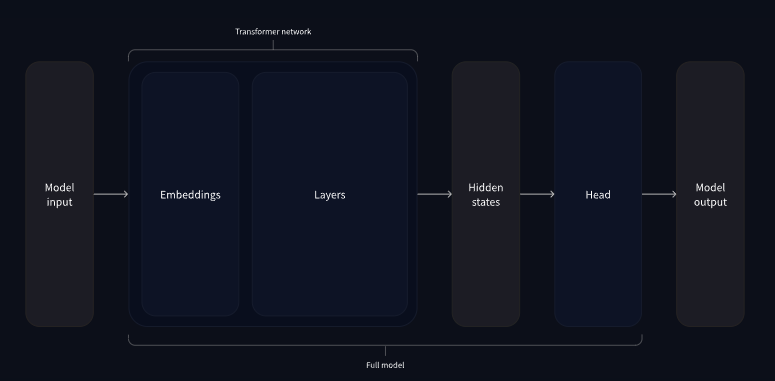

In [ ]:
# Model Head


In [ ]:
# Instantiating a Bert Model
from transformers import BertConfig, BertModel

# Building the config
config = BertConfig()
print(config)
# Building the model from the config
model = BertModel(config)

## Loading Methods

In [41]:
# Creating a model from the default configuration initializes it with random values
from transformers import BertConfig, BertModel
config = BertConfig()
model = BertModel(config)



The model can be used in this state, but it will output gibberish; it needs to be trained first. We could train the model from scratch on the task at hand, but as you saw in Chapter 1, this would require a long time and a lot of data, and it would have a non-negligible environmental impact. To avoid unnecessary and duplicated effort, it’s imperative to be able to share and reuse models that have already been trained.

In [ ]:
from transformers import BertModel
model = BertModel.from_pretrained("bert-base-cased")

## Saving a Model

In [ ]:
model.save_pretrained("directory_on_my_computer")

# This saves two files to your disk:
# (1)ls directory_on_my_computer:  configuration is necessary to know your model’s architecture
# (2)config.json pytorch_model.bin: model weights are your model’s parameters.

## Inferencing  

In [ ]:
# sequences
# AutoTokenizer that
# Then feed to model

# Inside Tokenizer API

In [42]:
# UNDERSTANDING OF TOKENIZERS AND TYPES OF TOKENIZERS
# Tokenizers have one function, they convert raw text into numbers which can be fed into a model
# There are three methods of tokenization

# (1)Word Based: Splitting based on words, punctuations etc
# Issues: Too large of a vocab size
# Resolve: Reduce The Vocab size
# Issues With The Resolve: Many Words are recognized as out of vocabulary, leading to loss of information


# (2)Character Based: Splitting Based on Characters
# Advantages: Reduced Vocaulary Size
# Issues: But the meaning of each characters contains very less meaning compared to a word
# Issues: Since Splitting is done on each characters the sequence length gets very big, even for small sentences,
# Hence the model input gets very limited


# (3)Subword Based:
# Rule-1: Frequently used words are not to be split
# Rule-2: Rare Words are to be broken down meaningfully
# This resolves to some exctent the issues of bigger vocabulary
# This also preserves the meaning's of the word.

# There are also many other Tokenization methodologies used, some examples are:
# (1)Byte-level BPE in GPT-2
# (2)WordPiece in BERT
# (3) SentencePiece or Unigram in several multilingual models

In [ ]:
# Loading a Tookenizer
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

# or General Method
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# Using the tokenizer
tokenizer("Using a Transformer network is simple")

# Saving a tokenizer
tokenizer.save_pretrained("directory_on_my_computer")